In [141]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2gray
from skimage import data, transform

from scipy import fft

In [142]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

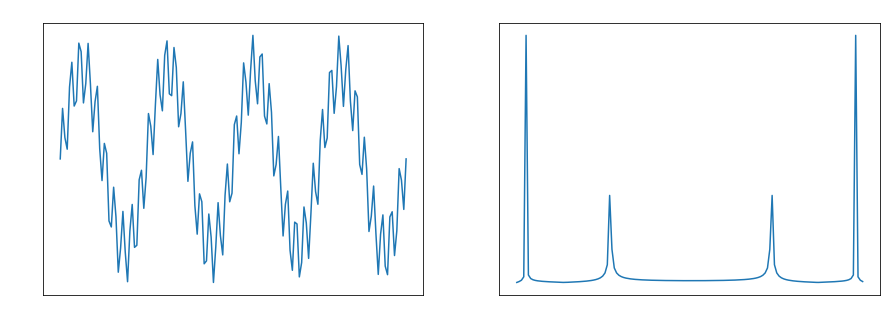

In [143]:
x = np.linspace(0, 8*np.pi, 150)

y_1 = 2*np.sin(x)
y_2 = 0.8*np.sin(10*x)

y = y_1 + y_2

y_f = fft.fft(y)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcia z dvoch sinusov s roznym f a A')
plt.subplot(122)
plt.title('Fourrier transform of the signal')
plt.plot(np.abs(y_f))

E:\PV\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y')

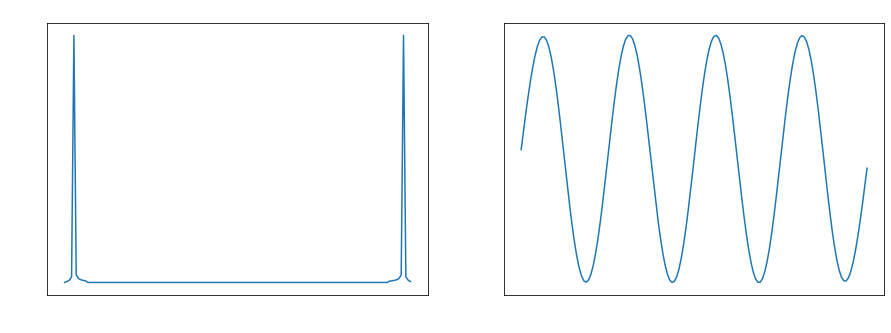

In [144]:
y_f_removed_f = y_f
y_f_removed_f[10:140] = 0  + 0.j
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.abs(y_f))
plt.xlabel('y')
plt.ylabel('f')
plt.title('Frekvencne spektrum s jednym odstranenym peakom')
plt.subplot(122)
y_t = fft.ifft(y_f)
plt.plot(x,y_t)
plt.xlabel('x')
plt.ylabel('y')

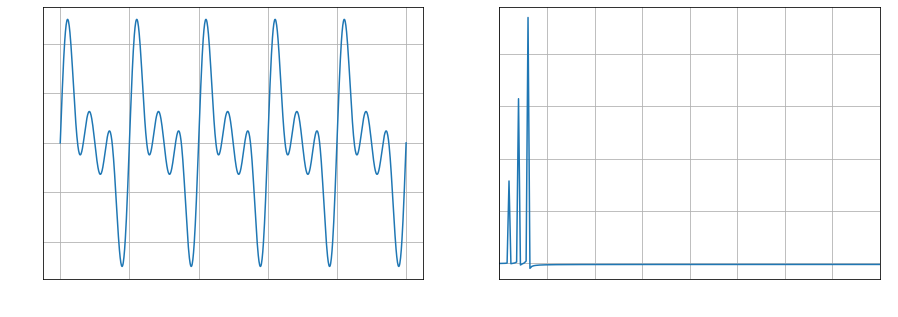

In [145]:
N = 1000
Fs  = 100 # Hz vzorkovacia frekvencia

T = N/Fs

x = np.linspace(0, 10*np.pi, N)

y_1 = np.sin(x) + np.sin(2*x) + np.sin(3*x)

f = np.linspace(0,N-1,N)*Fs/N

plt.figure(figsize=(15,5))
y_f = fft.fft(y_1)

plt.subplot(121)
plt.plot(y_1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.subplot(122)
plt.plot(f,np.real(y_f))
plt.axis([0,20,np.min(np.real(y_f))-1,np.max(np.real(y_f))+1])
plt.xlabel('Hz')
plt.ylabel('Y*Hz^-1')

plt.grid()

Text(0.5, 1.0, 'Amplitudove spektrum, zvacsene')

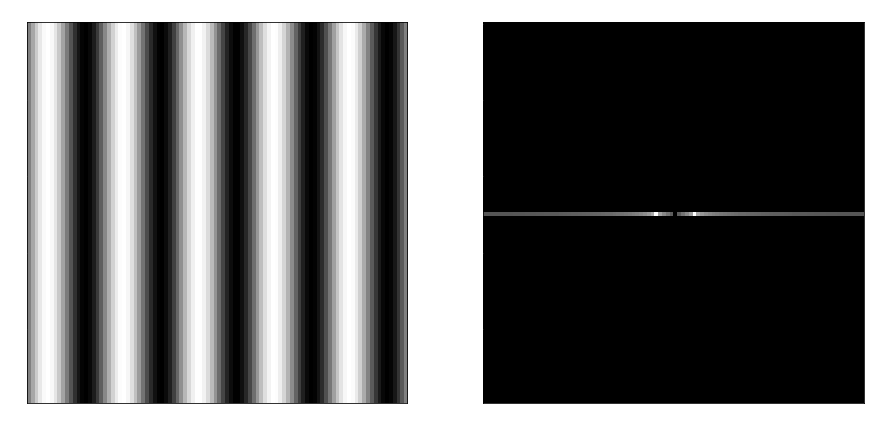

In [146]:
N=100
x = np.array([np.linspace(0,10*np.pi,N)])
y = np.sin(x)
im = np.repeat(y, 100,axis=0)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title("Povodny obrazok")
plt.subplot(122)
im_fft= fft.fft2(im)

zero_center_im_fft = fft.fftshift(im_fft)

plt.imshow(np.log(1+np.abs(zero_center_im_fft)),cmap='gray')
plt.title("Amplitudove spektrum, zvacsene")

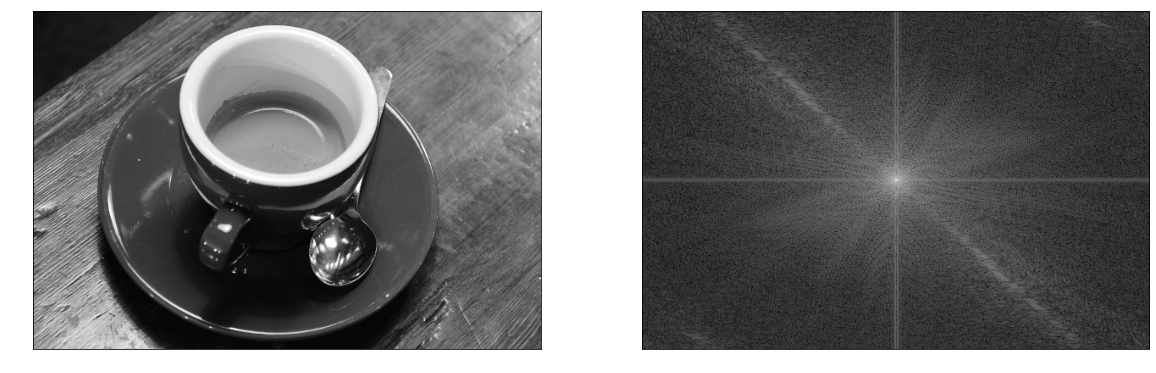

In [147]:
im = rgb2gray(data.coffee())
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)),cmap='gray')

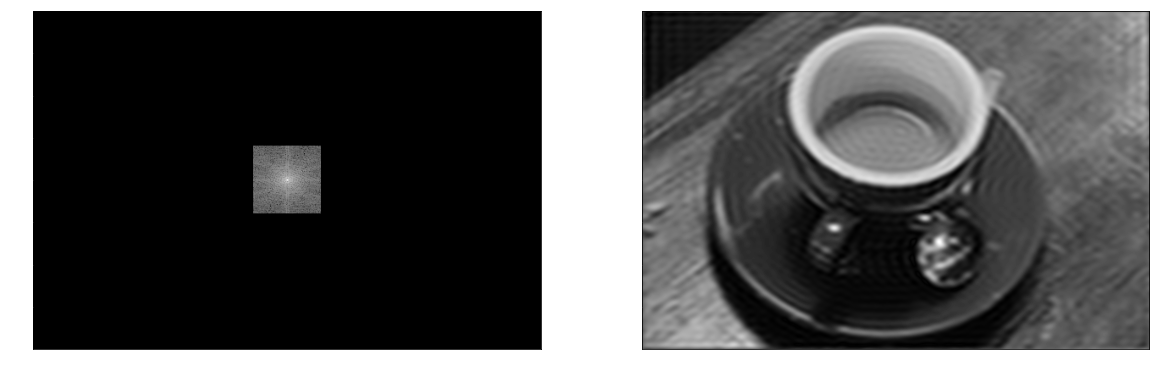

In [148]:
plt.figure(figsize=(20,15))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = np.zeros(zero_center_im_fft.shape,dtype=np.complex)

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] =\
    zero_center_im_fft[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls]

plt.imshow(np.log(1+np.abs(filtered_spectrum)),cmap='gray')
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img),cmap='gray')

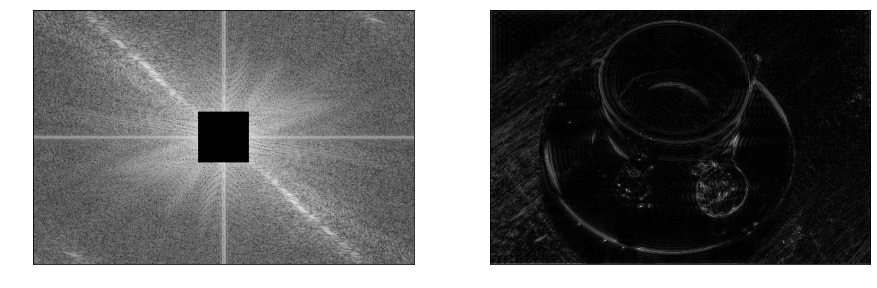

In [149]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = zero_center_im_fft

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] = 0+0.j
plt.imshow(np.log(1+np.abs(filtered_spectrum)),cmap='gray')
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

Text(0.5, 1.0, 'Amplitudove spektrum')

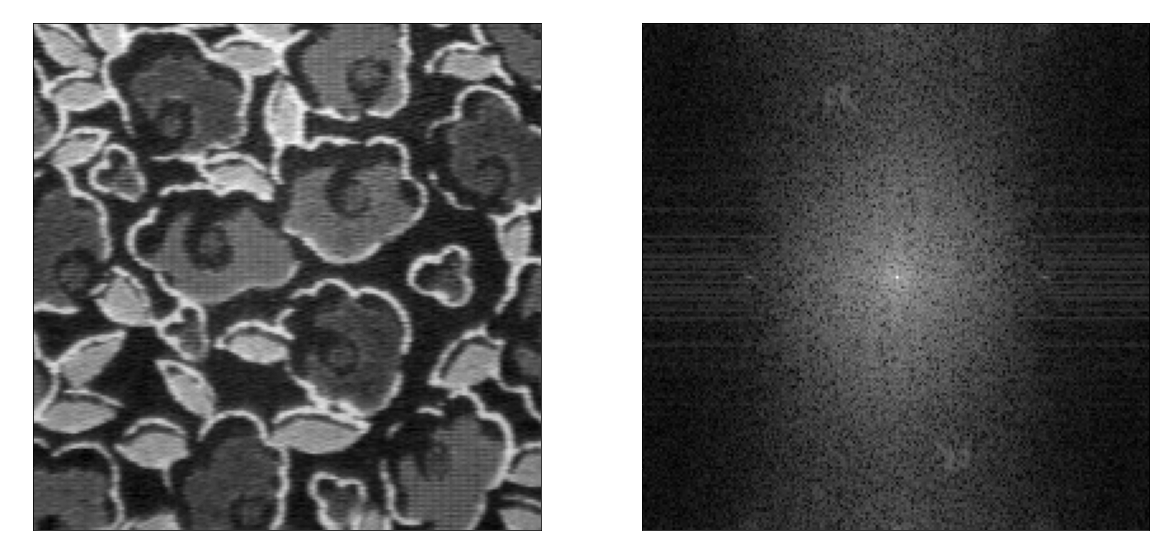

In [150]:
Y = rgb2gray(imageio.imread("./imgs/Fabric.jpg"))
Y = Y[140:340, 220:420]

plt.figure(figsize=(20,15))
plt.subplot(121)

plt.imshow(Y,cmap='gray')
plt.title("Povodny obrazok")
plt.subplot(122)

F= fft.fft2(Y)
zero_center_F = fft.fftshift(F)

plt.imshow(np.log(1+np.abs(zero_center_F)),cmap='gray')
plt.title("Amplitudove spektrum")

Text(0.5, 1.0, 'Filtrovany obrazok, dolna priepust')

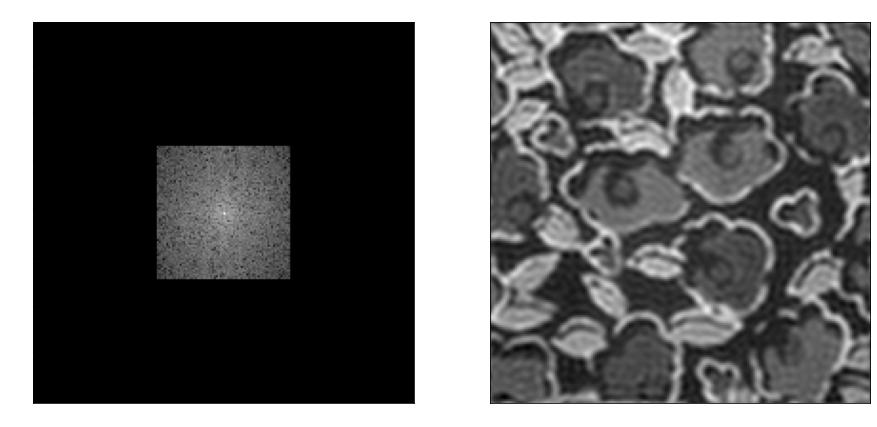

In [151]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 35

F= fft.fft2(Y)
zero_center_F = fft.fftshift(F)

Y_size = Y.shape
filtered_spectrum = np.zeros(zero_center_F.shape,dtype=np.complex)

filtered_spectrum[Y_size[0]//2-pxls:Y_size[0]//2+pxls,Y_size[1]//2-pxls:Y_size[1]//2+pxls] =\
    zero_center_F[Y_size[0]//2-pxls:Y_size[0]//2+pxls,Y_size[1]//2-pxls:Y_size[1]//2+pxls]

plt.imshow(np.log(1+np.abs(filtered_spectrum)),cmap='gray')
plt.title("Amplitudove spektrum, filtrovane")
plt.subplot(122)

inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')
plt.title("Filtrovany obrazok, dolna priepust")

Text(0.5, 1.0, 'Filtrovany obrazok, horna priepust')

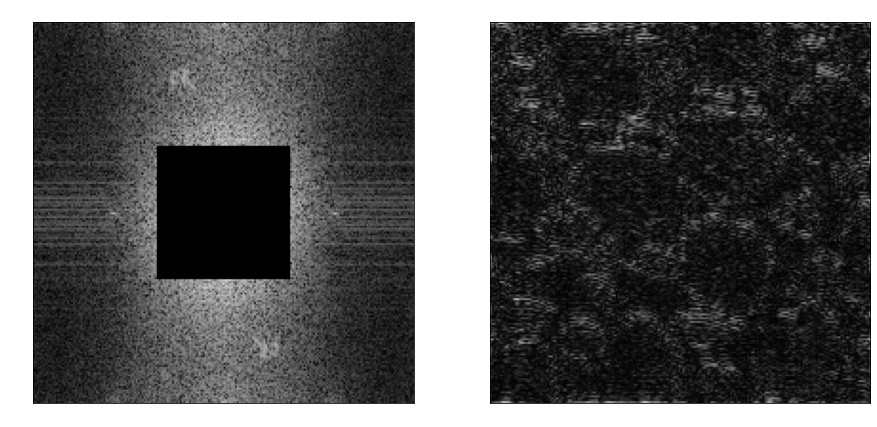

In [152]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 35

image_fft= fft.fft2(Y)
zero_center_F = fft.fftshift(F)
Y_size = Y.shape
filtered_spectrum = zero_center_F

filtered_spectrum[Y_size[0]//2-pxls:Y_size[0]//2+pxls,Y_size[1]//2-pxls:Y_size[1]//2+pxls] = 0+0.j
plt.imshow(np.log(1+np.abs(filtered_spectrum)),cmap='gray')
plt.title("Amplitudove spektrum, filtrovane")

plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')
plt.title("Filtrovany obrazok, horna priepust")

<ipython-input-153-01dd28f177cb>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img_text = rgb2gray(imageio.imread("./imgs/text.png"))


Text(0.5, 1.0, 'Polohy hladaneho vzoru')

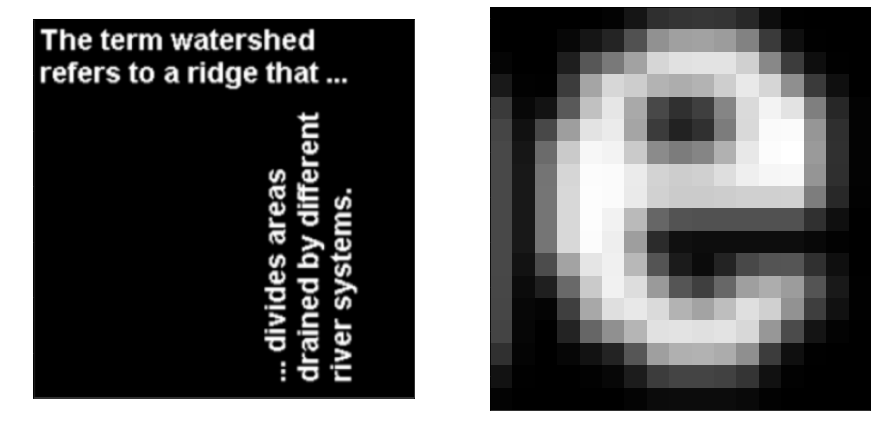

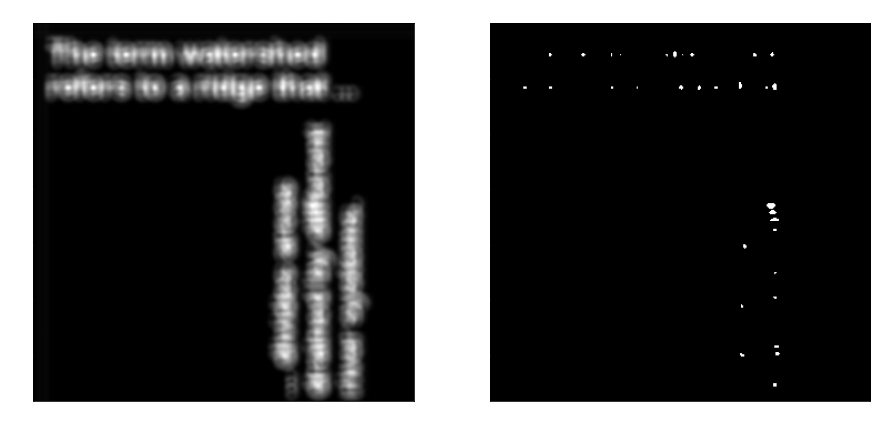

In [153]:
img_text = rgb2gray(imageio.imread("./imgs/text.png"))

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img_text, cmap='gray')

kernel = transform.rotate(img_text[12:30, 38:55],180)
plt.subplot(122)
plt.imshow(transform.rotate(kernel, 180), cmap='gray')

size = img_text.shape
C = np.real(np.fft.ifft2(np.fft.fft2(img_text) * np.fft.fft2(kernel, size)))

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(C, cmap='gray')
plt.title("Vysledok nasobenia vo frekvencnej oblasti")

thresh = C > 70
plt.subplot(122)
plt.imshow(thresh, cmap='gray')
plt.title("Polohy hladaneho vzoru")

Text(0.5, 1.0, 'Amplitudove spektrum')

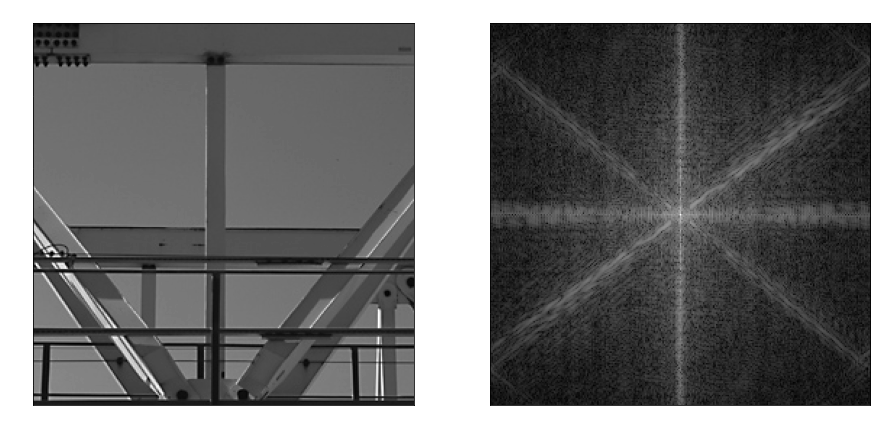

In [154]:
Y = rgb2gray(imageio.imread("./imgs/gantrycrane.png"))
Y = Y[:, 69:332]

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(Y,cmap='gray')
plt.title("Povodny obrazok")

F = fft.fft2(Y)
F_shift = fft.fftshift(F)
F2 = np.log(1+np.abs(F_shift))

plt.subplot(122)
plt.imshow(F2,cmap='gray')
plt.title("Amplitudove spektrum")

Text(0.5, 1.0, 'Filtrovany obrazok')

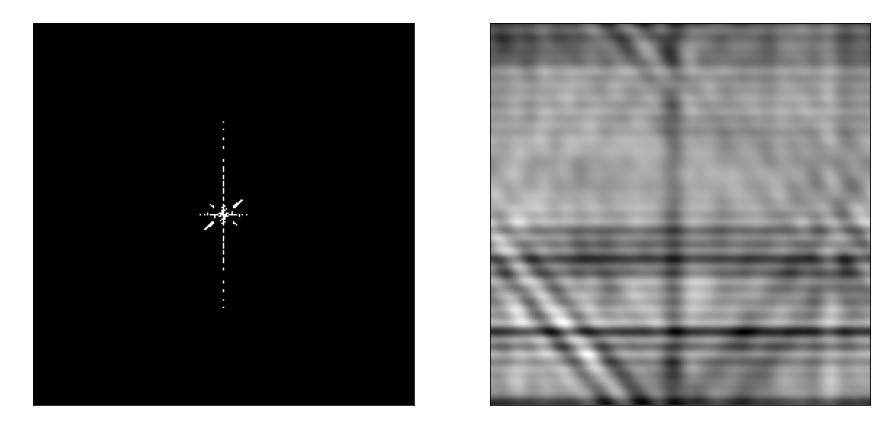

In [155]:
F2 = np.log(1+np.abs(F_shift))
thresh = F2 > 0.55*np.max(F2)

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(thresh, cmap='gray')
plt.title("Amplitudove spektrum, prah'")

circ_filter = np.zeros(F.shape)
r = 30
s1, s2 = circ_filter.shape

for i in range(s1):
    for j in range(s2):
        if np.sqrt(np.sum(np.power((i - s1/2) - (j - s2/2), 2))) < r:
            circ_filter[i, j] = 1

F3 = F_shift*thresh*circ_filter
Y = fft.ifft2(fft.ifftshift(F3))

plt.subplot(122)
plt.imshow(np.abs(Y), cmap='gray')
plt.title("Filtrovany obrazok")

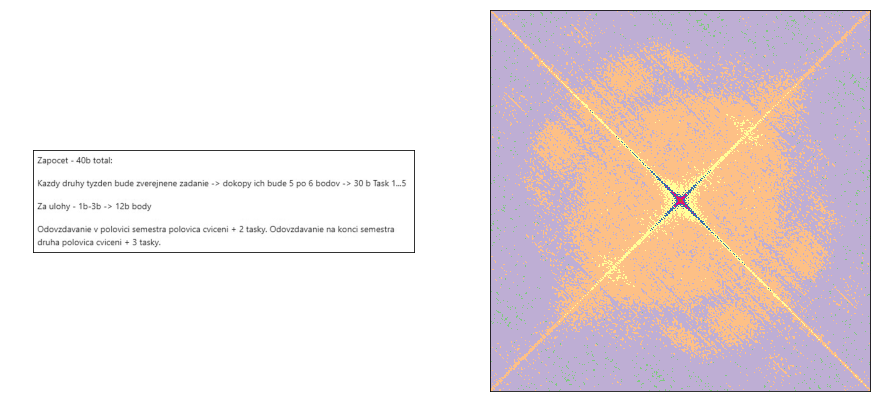

In [157]:
text = rgb2gray(imageio.imread("./imgs/Text_2.jpg"))
text_r = transform.rotate(text, 45, resize=True)

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(text, cmap='gray')

plt.subplot(122)
text_F = fft.fft2(text_r)
text_F_shift = fft.fftshift(text_F)
plt.imshow(np.log(1+np.abs(text_F_shift)),cmap='Accent')